In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df = pd.read_excel('Data_forecast_covid2020.xlsx')

In [3]:
df = df[['Tanggal','POSITIF']]

In [4]:
df = df.groupby('Tanggal', sort=False, as_index=True).agg(sum)
df

,POSITIF
Tanggal,
25-03-2020,880
26-03-2020,1030
27-03-2020,1132
28-03-2020,1206
29-03-2020,1402
...,...
27-12-2020,351852
28-12-2020,355208
29-12-2020,359320


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_data = scaler.fit_transform(df[:225])
test_data = scaler.fit_transform(df[225:])

In [6]:
df.head()

,POSITIF
Tanggal,
25-03-2020,880
26-03-2020,1030
27-03-2020,1132
28-03-2020,1206
29-03-2020,1402


In [7]:
train_data[:5]

array([[0.        ],
       [0.00069329],
       [0.00116473],
       [0.00150675],
       [0.00241265]])

In [8]:
scaler.inverse_transform(train_data[:5])

array([[218822.        ],
       [218925.05601775],
       [218995.13410982],
       [219045.97507857],
       [219180.63494176]])

In [9]:
print("Shape of train data: " + str(train_data.shape))
print("Shape of test data: " + str(test_data.shape))

Shape of train data: (225, 1)
Shape of test data: (57, 1)


In [10]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 3
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [12]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (221, 3)
Shape of train labels: (221,)
Shape of test input: (53, 3)
Shape of test labels: (53,)


In [13]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (221, 1, 3)
Shape of train labels: (221,)
Shape of test input: (53, 1, 3)
Shape of test labels: (53,)


In [15]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
221/221 - 7s - loss: 0.1414 - 7s/epoch - 31ms/step
Epoch 2/100
221/221 - 1s - loss: 0.0686 - 773ms/epoch - 3ms/step
Epoch 3/100
221/221 - 1s - loss: 0.0365 - 596ms/epoch - 3ms/step
Epoch 4/100
221/221 - 1s - loss: 0.0149 - 600ms/epoch - 3ms/step
Epoch 5/100
221/221 - 1s - loss: 0.0036 - 594ms/epoch - 3ms/step
Epoch 6/100
221/221 - 1s - loss: 5.1857e-04 - 605ms/epoch - 3ms/step
Epoch 7/100
221/221 - 1s - loss: 1.1645e-04 - 642ms/epoch - 3ms/step
Epoch 8/100
221/221 - 1s - loss: 8.8357e-05 - 622ms/epoch - 3ms/step
Epoch 9/100
221/221 - 1s - loss: 8.4340e-05 - 588ms/epoch - 3ms/step
Epoch 10/100
221/221 - 1s - loss: 8.5700e-05 - 596ms/epoch - 3ms/step
Epoch 11/100
221/221 - 1s - loss: 8.4741e-05 - 587ms/epoch - 3ms/step
Epoch 12/100
221/221 - 1s - loss: 8.5048e-05 - 584ms/epoch - 3ms/step
Epoch 13/100
221/221 - 1s - loss: 8.4613e-05 - 584ms/epoch - 3ms/step
Epoch 14/100
221/221 - 1s - loss: 8.4019e-05 - 589ms/epoch - 3ms/step
Epoch 15/100
221/221 - 1s - loss: 8.4265e-05 - 589m

In [17]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 5ms/step


In [18]:
testPredict[:5]

array([[0.00962345],
       [0.02029426],
       [0.03279229],
       [0.04438998],
       [0.05442339]], dtype=float32)

In [19]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [20]:
y_pred_test_lstm = model.predict(testX)
y_train_pred_lstm = model.predict(trainX)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(trainY[0], trainPredict[:,0])))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(testY[0], testPredict[:,0])))

7/7 [==============================] - 0s 4ms/step
The R2 score on the Train set is:	1.000
The R2 score on the Test set is:	0.991


In [21]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 380.52 RMSE
Test Score: 3788.75 RMSE


In [22]:
dates = pd.date_range(start='2020-03-01 00:00:00', end='2020-12-31 00:00:00', periods=trainY.shape[1])
dates

DatetimeIndex([          '2020-03-01 00:00:00',
               '2020-03-02 09:16:21.818181818',
               '2020-03-03 18:32:43.636363636',
               '2020-03-05 03:49:05.454545454',
               '2020-03-06 13:05:27.272727272',
               '2020-03-07 22:21:49.090909091',
               '2020-03-09 07:38:10.909090909',
               '2020-03-10 16:54:32.727272727',
               '2020-03-12 02:10:54.545454545',
               '2020-03-13 11:27:16.363636363',
               ...
               '2020-12-18 12:32:43.636363636',
               '2020-12-19 21:49:05.454545456',
               '2020-12-21 07:05:27.272727272',
               '2020-12-22 16:21:49.090909092',
               '2020-12-24 01:38:10.909090912',
               '2020-12-25 10:54:32.727272728',
               '2020-12-26 20:10:54.545454548',
               '2020-12-28 05:27:16.363636364',
               '2020-12-29 14:43:38.181818184',
                         '2020-12-31 00:00:00'],
              dtype=

In [23]:
trainActual = pd.DataFrame({'Precipitation': trainY[0]})
trainActual.index = dates

trainPredictdf = pd.DataFrame({'Precipitation': trainPredict[:,0]})
trainPredictdf.index = dates

In [24]:
trainActual

,Precipitation
2020-03-01 00:00:00.000000000,219045.975079
2020-03-02 09:16:21.818181818,219180.634942
2020-03-03 18:32:43.636363636,219216.361028
2020-03-05 03:49:05.454545454,219308.424404
2020-03-06 13:05:27.272727272,219338.654169
...,...
2020-12-25 10:54:32.727272728,362285.595267
2020-12-26 20:10:54.545454548,363316.155445
2020-12-28 05:27:16.363636364,364151.596229
2020-12-29 14:43:38.181818184,365558.654391


In [25]:
trainPredictdf

,Precipitation
2020-03-01 00:00:00.000000000,219026.046875
2020-03-02 09:16:21.818181818,219103.593750
2020-03-03 18:32:43.636363636,219185.546875
2020-03-05 03:49:05.454545454,219246.906250
2020-03-06 13:05:27.272727272,219344.562500
...,...
2020-12-25 10:54:32.727272728,362203.656250
2020-12-26 20:10:54.545454548,363141.250000
2020-12-28 05:27:16.363636364,364069.125000
2020-12-29 14:43:38.181818184,364868.937500


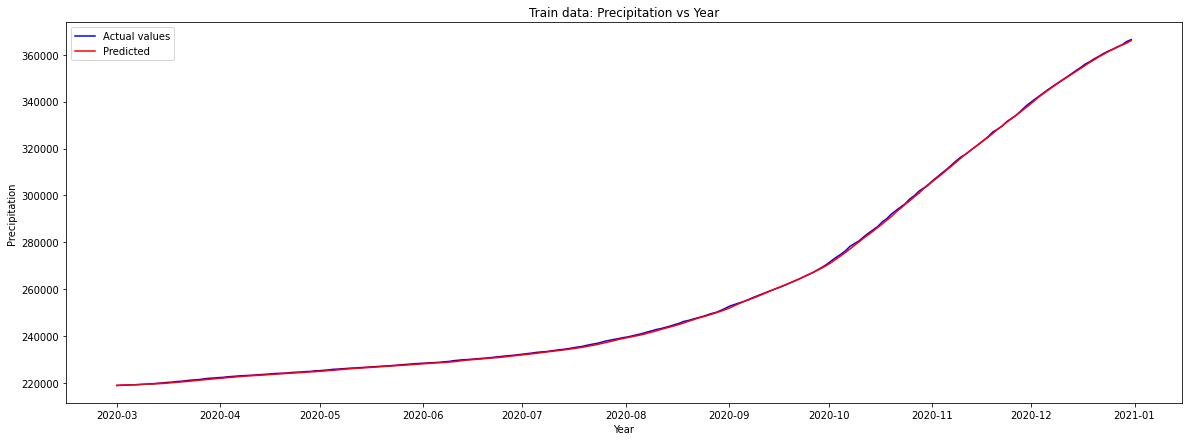

In [26]:
plt.figure(figsize=(20,7))
plt.plot(trainActual, color='blue', label='Actual values')
plt.plot(trainPredictdf, color='red', label='Predicted')
plt.title('Train data: Precipitation vs Year')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.legend(loc='best')
plt.savefig('LSTMCov2020.jpg',  dpi=300, bbox_inches='tight')